In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('demo01.csv')
print(f'Numero de linhas e colunas {df.shape}')

df.head()

Numero de linhas e colunas (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


mau
False    16260
True       390
Name: count, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


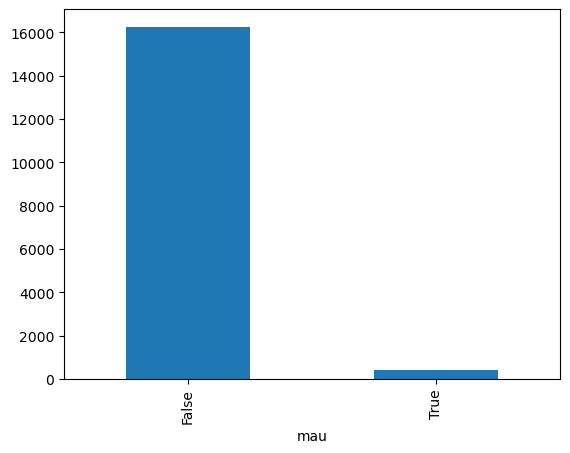

In [20]:
grafico_barras = df['mau'].value_counts().plot.bar()

print(df['mau'].value_counts())
print('\nTaxa de inadimplentes:')
print(df['mau'].mean())

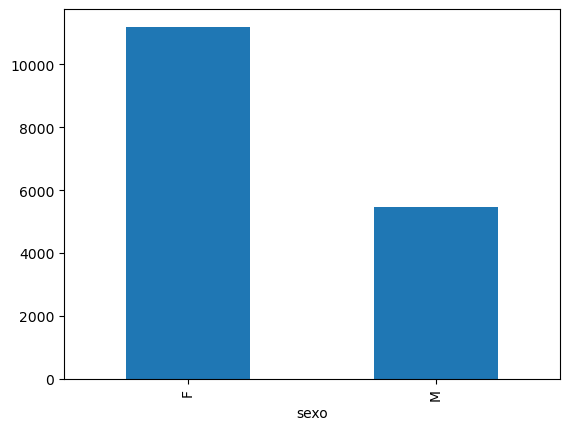

In [56]:
grafico_barras2 = df['sexo'].value_counts().plot.bar()

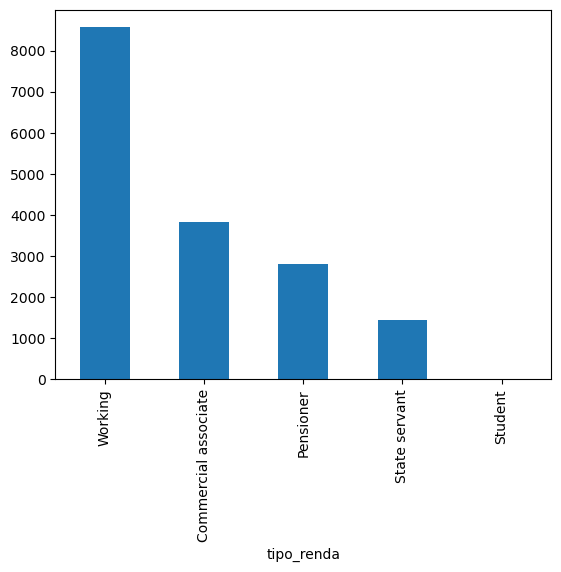

In [60]:
grafico_barras3 = df['tipo_renda'].value_counts().plot.bar()

<Figure size 640x480 with 0 Axes>

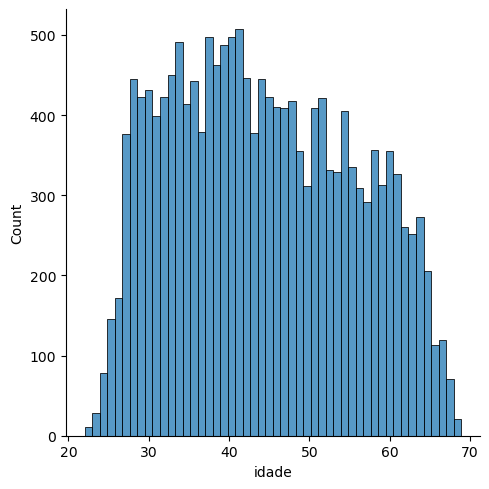

In [26]:
plt.clf()
var = 'idade'

def grafico(var):
    sns.displot(df, x=var, bins=50)
    plt.show()

grafico(var)

<Figure size 640x480 with 0 Axes>

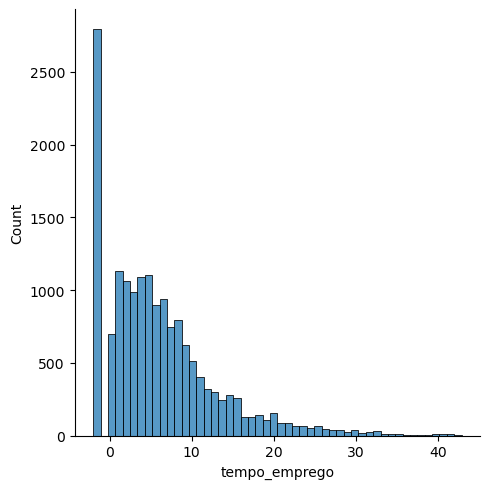

In [38]:
plt.clf()
var = 'tempo_emprego'
df.loc[df[var]<0, var] = -2

grafico(var)

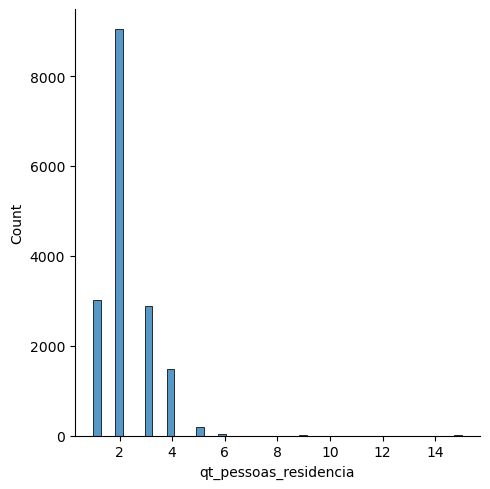

In [42]:
grafico('qt_pessoas_residencia')

C:\Users\enzob\AppData\Local\Temp\ipykernel_13552\1141362455.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


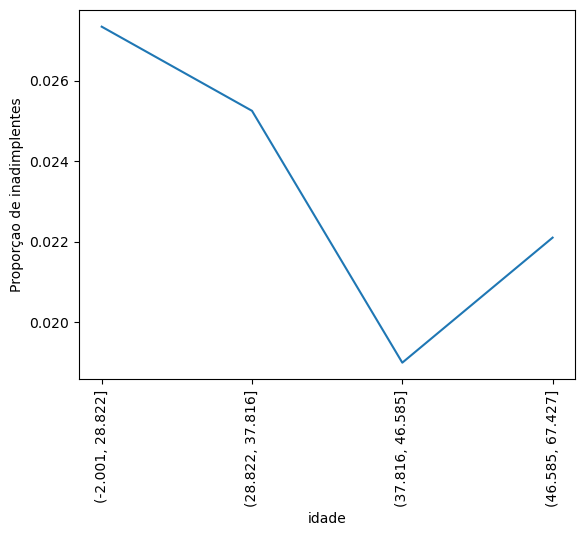

In [48]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel('Proporçao de inadimplentes')
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

C:\Users\enzob\AppData\Local\Temp\ipykernel_13552\3648939469.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


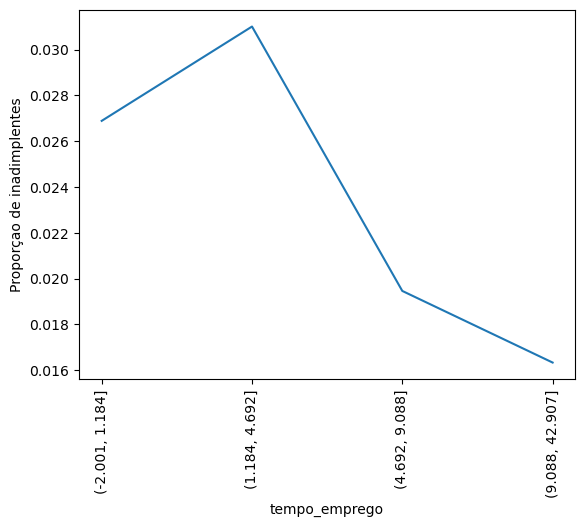

In [62]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel('Proporçao de inadimplentes')
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

O gráfico anterior apresenta que há um risco em conseder crédico para clientes com pouco tempo de emprego

In [54]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])
metadata['n_categorias'] = 0
for var in metadata.index:
    metadata.loc[var, 'n_categorias'] = len(df.groupby([var]).size())

metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,4397
tempo_emprego,float64,3005


In [82]:
def convert_dummy(df, feature, rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest], axis=1, inplace=True)
    df.drop([feature], axis=1, inplace=True)
    df = df.join(pos)
    return df

In [140]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

KeyError: 'sexo'

In [136]:
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,True,False,False,False,False,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,False,False,False,False,False,False,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False


In [88]:
x = df.drop("mau",axis = 1)
y = df["mau"]

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [90]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
16295,0,52.331507,4.715068,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
8535,1,42.298630,7.136986,1,0,0,0,3.0,True,True,...,False,False,False,False,False,False,False,False,False,False
8797,0,37.246575,3.800000,1,0,0,0,1.0,False,False,...,False,False,False,True,False,False,False,False,True,False
1639,0,50.238356,5.060274,1,0,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,False
13906,0,39.164384,5.706849,1,1,1,0,1.0,True,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1,31.380822,4.597260,1,0,1,1,3.0,False,True,...,False,False,False,False,False,False,False,False,False,False
8892,0,-2.000000,-2.000000,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
3066,0,43.624658,2.632877,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
6801,0,25.482192,4.797260,1,0,0,0,2.0,False,False,...,False,True,False,False,False,False,False,False,False,False


In [128]:
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [130]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.45%


In [132]:
tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab.iloc[1][0]/(tab.iloc[1][0] + tab.iloc[0][0]))
print(tab.iloc[1][1]/(tab.iloc[1][1] + tab.iloc[0][1]))
tab

0.0076148366494718745
0.18478260869565216


C:\Users\enzob\AppData\Local\Temp\ipykernel_13552\2166625495.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(tab.iloc[1][0]/(tab.iloc[1][0] + tab.iloc[0][0]))
C:\Users\enzob\AppData\Local\Temp\ipykernel_13552\2166625495.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(tab.iloc[1][1]/(tab.iloc[1][1] + tab.iloc[0][1]))


mau,False,True
row_0,,
False,4040,75
True,31,17
